<a href="https://colab.research.google.com/github/Thcataclismo/EDA-and-Visualization/blob/main/Eda_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importação de bibliotecas para análise e visualização de dados
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [4]:
# Ler dados de um arquivo CSV em um DataFrame do pandas
df=pd.read_csv("/content/Electric_Vehicle_Population_Size_History_By_County_.csv")
df

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19
...,...,...,...,...,...,...,...,...,...,...
20814,January 31 2023,Rockingham,NH,Passenger,1,0,1,14,15,6.67
20815,July 31 2020,Carson City,NV,Passenger,1,0,1,10,11,9.09
20816,February 28 2022,Island,WA,Passenger,744,350,"1,094","62,257","63,351",1.73
20817,December 31 2020,San Diego,CA,Passenger,14,2,16,"2,724","2,740",0.58


In [8]:
# listas vazias para armazenar datas, meses e anos
days=list()
months=list()
years=list()

# Iterar cada string de data na coluna "Date" do DataFrame 'df'
for x in df["Date"]:
  # Dividindo a string de data em uma lista usando espaço em branco (espaço) como delimitador
    x_split=x.split()
    # Extraindo dia, mês e ano das partes divididas e anexe-as às respectivas listas
    days.append(x_split[1])
    months.append(x_split[0])
    years.append(x_split[2])

In [9]:
# Cria colunas de ano, mês e dia a partir das listas preenchidas anteriormente
df["year"]=years
df["month"]=months
df["day"]=days

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
 10  year                              

In [11]:
# Convertendo colunas específicas em formato numérico, lidando com possíveis separadores de vírgula e ponto

df["Battery Electric Vehicles (BEVs)"] = pd.to_numeric(df["Battery Electric Vehicles (BEVs)"].str.replace(",", "").str.replace(".",""), errors='coerce')
df["Plug-In Hybrid Electric Vehicles (PHEVs)"] = pd.to_numeric(df["Plug-In Hybrid Electric Vehicles (PHEVs)"].str.replace(",", "").str.replace(".",""), errors='coerce')
df["Electric Vehicle (EV) Total"] = pd.to_numeric(df["Electric Vehicle (EV) Total"].str.replace(",", "").str.replace(".",""), errors='coerce')
df["Non-Electric Vehicle Total"] = pd.to_numeric(df["Non-Electric Vehicle Total"].str.replace(",", "").str.replace(".",""), errors='coerce')
df["Total Vehicles"] = pd.to_numeric(df["Total Vehicles"].str.replace(",", "").str.replace(".",""), errors='coerce')

/tmp/ipykernel_29948/1279207535.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Battery Electric Vehicles (BEVs)"] = pd.to_numeric(df["Battery Electric Vehicles (BEVs)"].str.replace(",", "").str.replace(".",""), errors='coerce')
/tmp/ipykernel_29948/1279207535.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Plug-In Hybrid Electric Vehicles (PHEVs)"] = pd.to_numeric(df["Plug-In Hybrid Electric Vehicles (PHEVs)"].str.replace(",", "").str.replace(".",""), errors='coerce')
/tmp/ipykernel_29948/1279207535.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* b

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  int64  
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  int64  
 6   Electric Vehicle (EV) Total               20819 non-null  int64  
 7   Non-Electric Vehicle Total                20819 non-null  int64  
 8   Total Vehicles                            20819 non-null  int64  
 9   Percent Electric Vehicles                 20819 non-null  float64
 10  year                              

In [13]:
# Transpor a tabela de resumo estatístico para facilitar a leitura e comparação
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Battery Electric Vehicles (BEVs),20819.0,217.516211,2278.533317,0.0,0.00,1.00,3.000,72333.0
Plug-In Hybrid Electric Vehicles (PHEVs),20819.0,80.063644,646.373208,0.0,0.00,1.00,2.000,17501.0
Electric Vehicle (EV) Total,20819.0,297.579855,2915.504792,0.0,1.00,1.00,4.000,89834.0
Non-Electric Vehicle Total,20819.0,25098.062539,106732.436167,0.0,43.00,163.00,8380.000,1399823.0
Total Vehicles,20819.0,25395.642394,109085.962150,1.0,44.00,165.00,8421.500,1430937.0
Percent Electric Vehicles,20819.0,4.139216,11.055350,0.0,0.39,1.22,2.995,100.0


In [14]:
# Agrupando dados por pais, calculando a proporção de veículos elétricos e exibindo os resultados
df_groupby_county = df.groupby("County").agg({"Electric Vehicle (EV) Total": "sum", "Total Vehicles": "sum"})

df_groupby_county["Electric Vehicle Ratio"] = df_groupby_county["Electric Vehicle (EV) Total"] / df_groupby_county["Total Vehicles"]

(df_groupby_county)

,Electric Vehicle (EV) Total,Total Vehicles,Electric Vehicle Ratio
County,,,
Ada,98,15408,0.006360
Adams,1758,1554217,0.001131
Alameda,322,23748,0.013559
Albemarle,118,1846,0.063922
Alexandria,175,7434,0.023540
...,...,...,...
Yavapai,25,766,0.032637
Yellowstone,24,430,0.055814
Yolo,12,252,0.047619


In [15]:
df_groupby_county

,Electric Vehicle (EV) Total,Total Vehicles,Electric Vehicle Ratio
County,,,
Ada,98,15408,0.006360
Adams,1758,1554217,0.001131
Alameda,322,23748,0.013559
Albemarle,118,1846,0.063922
Alexandria,175,7434,0.023540
...,...,...,...
Yavapai,25,766,0.032637
Yellowstone,24,430,0.055814
Yolo,12,252,0.047619


In [16]:
# Atribuindo os nomes dos paises (presentes no índice) como uma nova coluna "County" para melhor identificação dos dados
df_groupby_county["County"]=df_groupby_county.index

In [17]:
df_groupby_county

,Electric Vehicle (EV) Total,Total Vehicles,Electric Vehicle Ratio,County
County,,,,
Ada,98,15408,0.006360,Ada
Adams,1758,1554217,0.001131,Adams
Alameda,322,23748,0.013559,Alameda
Albemarle,118,1846,0.063922,Albemarle
Alexandria,175,7434,0.023540,Alexandria
...,...,...,...,...
Yavapai,25,766,0.032637,Yavapai
Yellowstone,24,430,0.055814,Yellowstone
Yolo,12,252,0.047619,Yolo


<Axes: title={'center': 'First 20 Electric Vehicle Ratio County according to County'}, xlabel='County', ylabel='Electric Vehicle Ratio'>

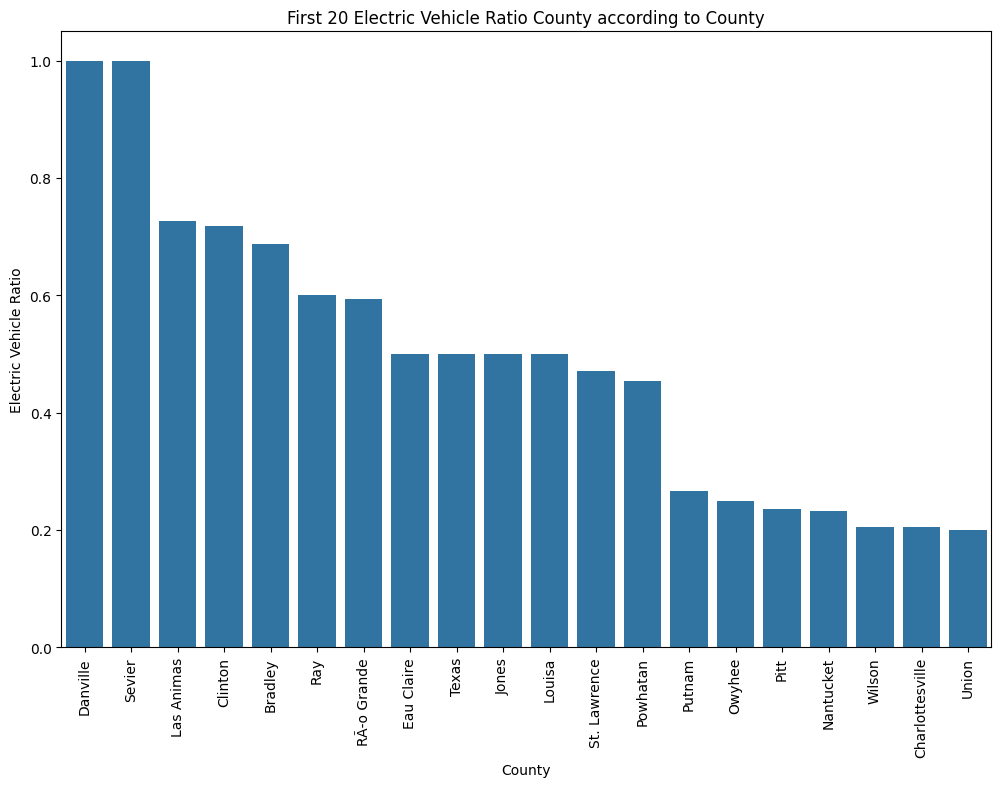

In [18]:
# Classificando os paises por proporção de veículos elétricos (o mais alto primeiro).

# Classificando o DataFrame por "Proporção de Veículos Elétricos" em ordem decrescente
df_groupby_county=df_groupby_county.sort_values(by="Electric Vehicle Ratio", ascending=False)

# Configurando grafico
plt.figure(figsize=(12,8))
plt.title("First 20 Electric Vehicle Ratio County according to County")
plt.xticks(rotation=90)

# Criando um gráfico de barras usando Seaborn
sns.barplot(df_groupby_county.head(20),x="County",y="Electric Vehicle Ratio")

In [19]:
# Agrupando dados por ano, calculando o total de veículos elétricos e o total de veículos por ano
df_groupby_year = df.groupby("year").agg({"Electric Vehicle (EV) Total": "sum", "Total Vehicles": "sum"})

In [20]:
# Atribuindo os anos (presentes no índice) como uma nova coluna "year" para melhor identificação dos dados
df_groupby_year["year"]=df_groupby_year.index

In [21]:
df_groupby_year

,Electric Vehicle (EV) Total,Total Vehicles,year
year,,,
2017,304741,71654083,2017
2018,416635,72773658,2018
2019,577980,74127191,2019
2020,715810,74596710,2020
2021,914806,75177880,2021
2022,1214793,74538471,2022
2023,1705405,73832146,2023
2024,345145,12011740,2024


In [23]:
# Calculando a proporção de veículos elétricos para cada ano e adicionando como uma nova coluna
df_groupby_year["Electric Vehicle (EV) Ratio"]=df_groupby_year["Electric Vehicle (EV) Total"] / df_groupby_year["Total Vehicles"]

In [24]:
df_groupby_year

,Electric Vehicle (EV) Total,Total Vehicles,year,Electric Vehicle (EV) Ratio
year,,,,
2017,304741,71654083,2017,0.004253
2018,416635,72773658,2018,0.005725
2019,577980,74127191,2019,0.007797
2020,715810,74596710,2020,0.009596
2021,914806,75177880,2021,0.012169
2022,1214793,74538471,2022,0.016298
2023,1705405,73832146,2023,0.023098
2024,345145,12011740,2024,0.028734


<Axes: title={'center': 'Electric Vehicle Ratio County according to Year'}, xlabel='year', ylabel='Electric Vehicle (EV) Ratio'>

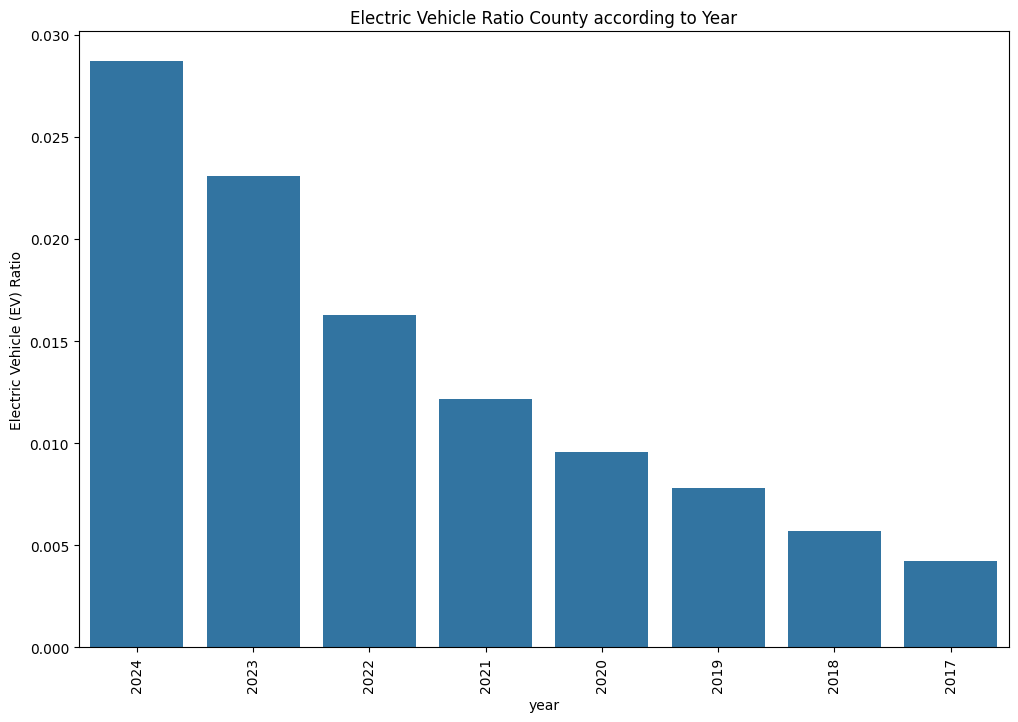

In [25]:
# Classificando os anos pela proporção de veículos elétricos (o mais alto primeiro) e visualizando a proporção por ano usando um gráfico de barras
df_groupby_year=df_groupby_year.sort_values(by="Electric Vehicle (EV) Ratio", ascending=False)
plt.title("Electric Vehicle Ratio County according to Year")
plt.xticks(rotation=90)
sns.barplot(df_groupby_year,x="year",y="Electric Vehicle (EV) Ratio")

In [26]:
df

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,year,month,day
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50,2022,September,30
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57,2022,December,31
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03,2020,January,31
3,June 30 2022,Ferry,WA,Truck,0,0,0,3575,3575,0.00,2022,June,30
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19,2021,July,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20814,January 31 2023,Rockingham,NH,Passenger,1,0,1,14,15,6.67,2023,January,31
20815,July 31 2020,Carson City,NV,Passenger,1,0,1,10,11,9.09,2020,July,31
20816,February 28 2022,Island,WA,Passenger,744,350,1094,62257,63351,1.73,2022,February,28
20817,December 31 2020,San Diego,CA,Passenger,14,2,16,2724,2740,0.58,2020,December,31


In [27]:
# Filtrando dados para veículos de passageiros e caminhões
passenger_data = df[df['Vehicle Primary Use'] == 'Passenger']
truck_data = df[df['Vehicle Primary Use'] == 'Truck']

In [28]:
# Agregando dados de veículos elétricos por ano para veículos de passageiros
passenger_data=passenger_data.groupby("year").agg({"Electric Vehicle (EV) Total":"sum"})

In [29]:
passenger_data

,Electric Vehicle (EV) Total
year,
2017,304566
2018,416469
2019,577826
2020,715649
2021,914636
2022,1210920
2023,1684806
2024,339776


In [30]:
# Agregando dados de veículos elétricos por ano para veículos de caminhão (semelhante aos dados de passageiros)
truck_data=truck_data.groupby("year").agg({"Electric Vehicle (EV) Total":"sum"})

In [31]:
truck_data

,Electric Vehicle (EV) Total
year,
2017,175
2018,166
2019,154
2020,161
2021,170
2022,3873
2023,20599
2024,5369


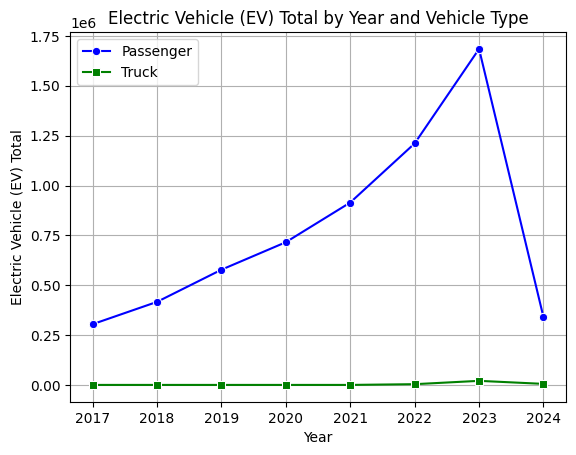

In [32]:
# Criando um gráfico de linhas para visualizar tendências de veículos elétricos para veículos de passageiros e caminhões
sns.lineplot(data=passenger_data, x='year', y='Electric Vehicle (EV) Total', label='Passenger', marker='o', color='blue')
sns.lineplot(data=truck_data, x='year', y='Electric Vehicle (EV) Total', label='Truck', marker='s', color='green')
plt.title('Electric Vehicle (EV) Total by Year and Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Electric Vehicle (EV) Total')


plt.legend()
plt.grid(True)
plt.show()